# Machine Learning Model (1) - Linear Regression 

This notebook aims to apply a Machine Learning model, Linear Regression, on the following splitted datasets:
- new_train_data.csv
- splitted_train_data.csv
- splitted_cv_data.csv

This is to evaluate which of the chosen predictor variables in the original dataset is best at predicting the following response variables.

Predictor variables:
- Education
- Marital_Status
- HaveChild
- YearRange
- Income
- TotalChild
- NumWebVisitsMonth

Response variables:
- MntGroceryProducts
- TotalPurchase
- MntWines
- MntGoldProds

# Importing Relevant Modules

In [30]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

# References (under construction)

- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
- https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html (data-encoding-and-splitting.ipynb)

# Importing Data 

In [31]:
newCustomerData = pd.read_csv('dataset/customerData_Clean.csv')
newCustomerData

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,806,25,1,1950,0,0
1,1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,9,6,0,1950,2,1
2,2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,287,21,0,1960,0,0
3,3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,34,8,0,1980,1,1
4,4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,2183,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,267,18,0,1960,1,1
2184,2184,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,30,22,1,1940,3,1
2185,2185,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,297,19,1,1980,0,0
2186,2186,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,324,23,0,1950,1,1


In [32]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2188 non-null   int64  
 1   Year_Birth           2188 non-null   int64  
 2   Education            2188 non-null   object 
 3   Marital_Status       2188 non-null   object 
 4   Income               2188 non-null   float64
 5   Kidhome              2188 non-null   int64  
 6   Teenhome             2188 non-null   int64  
 7   Dt_Customer          2188 non-null   object 
 8   Recency              2188 non-null   int64  
 9   MntWines             2188 non-null   int64  
 10  MntFruits            2188 non-null   int64  
 11  MntMeatProducts      2188 non-null   int64  
 12  MntFishProducts      2188 non-null   int64  
 13  MntSweetProducts     2188 non-null   int64  
 14  MntGoldProds         2188 non-null   int64  
 15  NumDealsPurchases    2188 non-null   i

# Visualization (for reference)

This section only covers a small part of visualization involving the use of Seaborn heatmap and jointplot to examine the correlations between numerical response and predictor variables.

<AxesSubplot:>

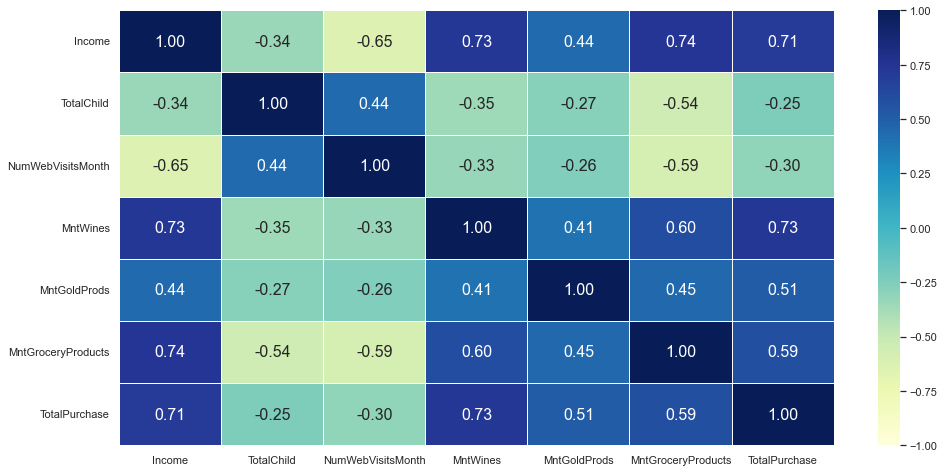

In [33]:
f = plt.figure(figsize=(16, 8))

sb.heatmap(newCustomerData[['Income','TotalChild','NumWebVisitsMonth',
                            'MntWines','MntGoldProds','MntGroceryProducts','TotalPurchase']].corr(), vmin = -1, vmax = 1, 
                            annot = True, annot_kws={"size": 16}, fmt=".2f", linewidths=.5, cmap="YlGnBu")

<Figure size 144x432 with 0 Axes>

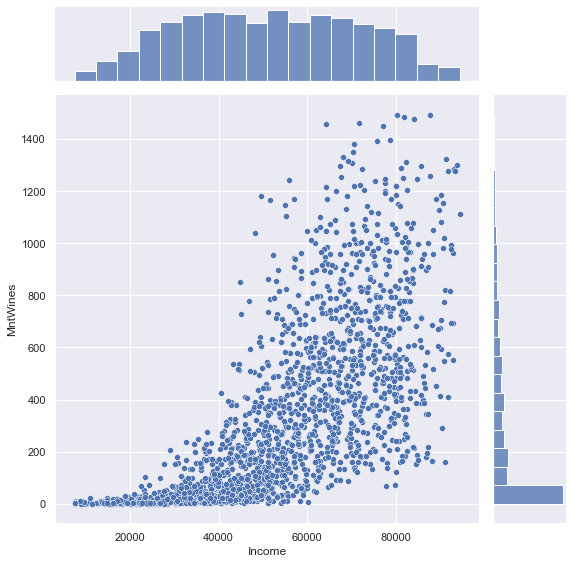

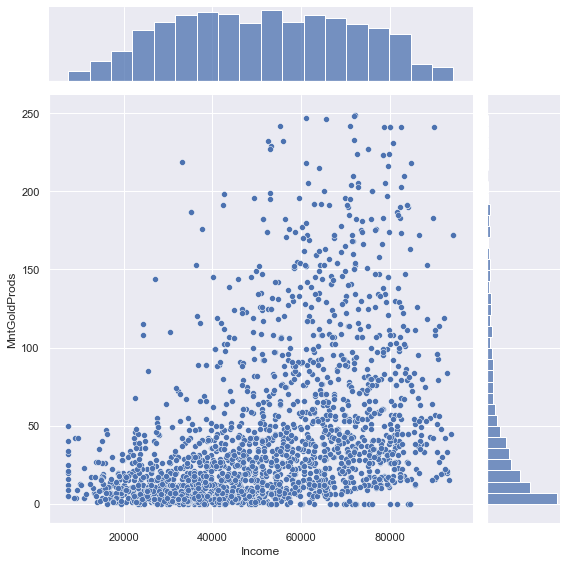

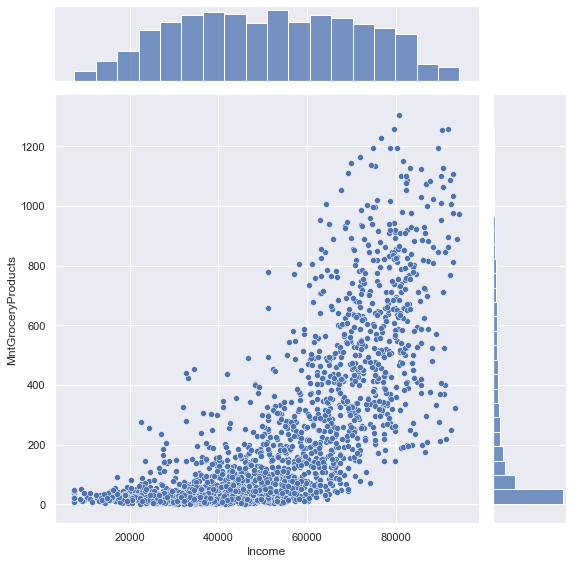

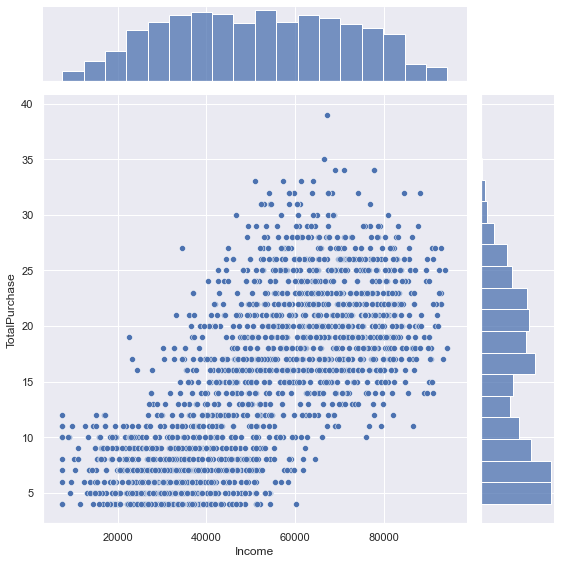

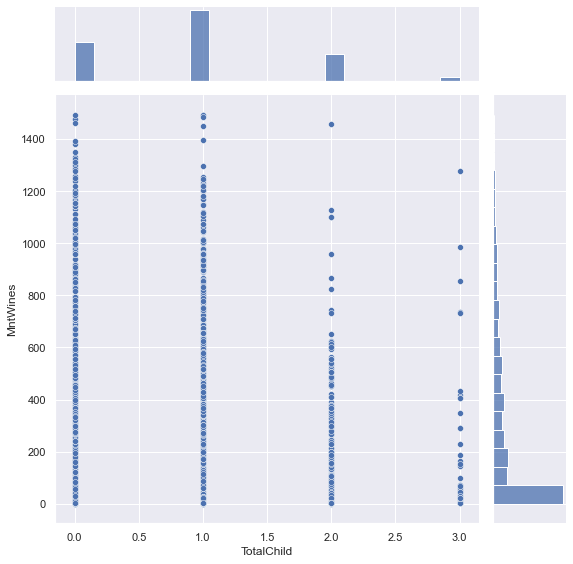

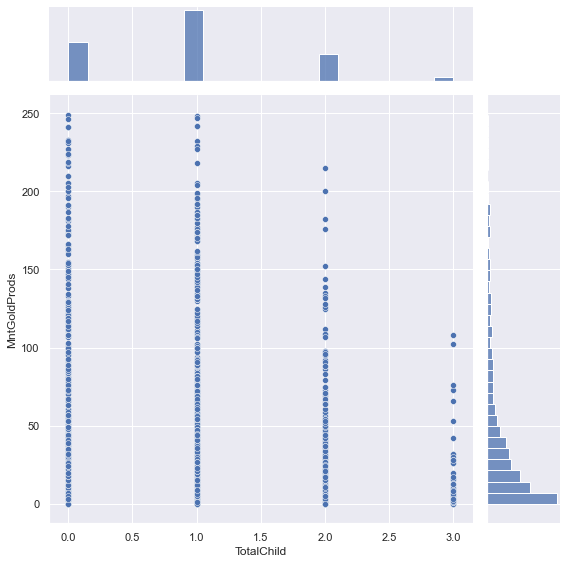

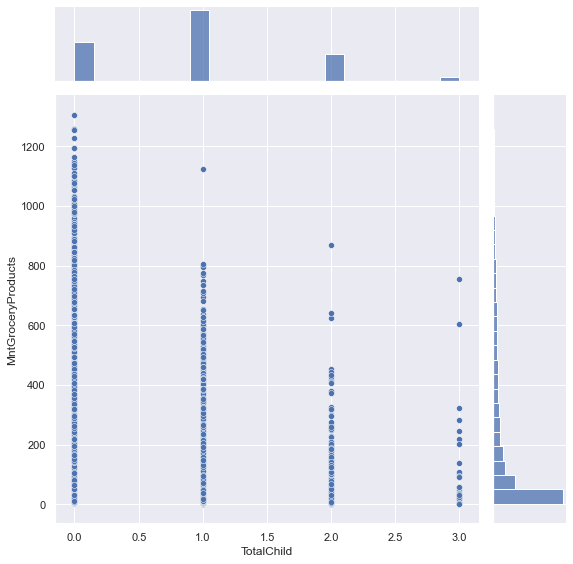

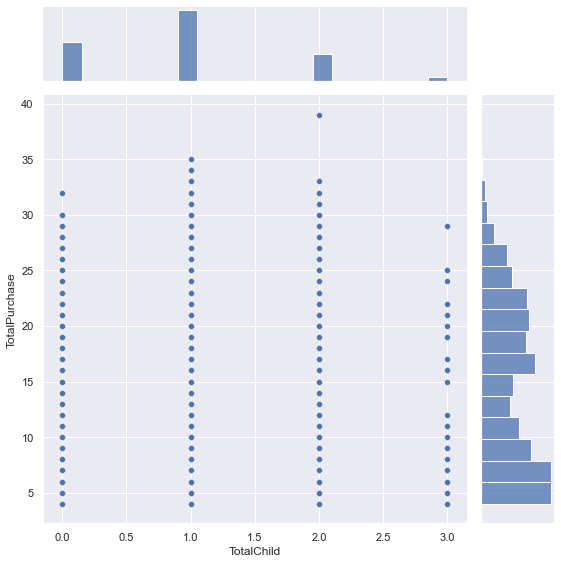

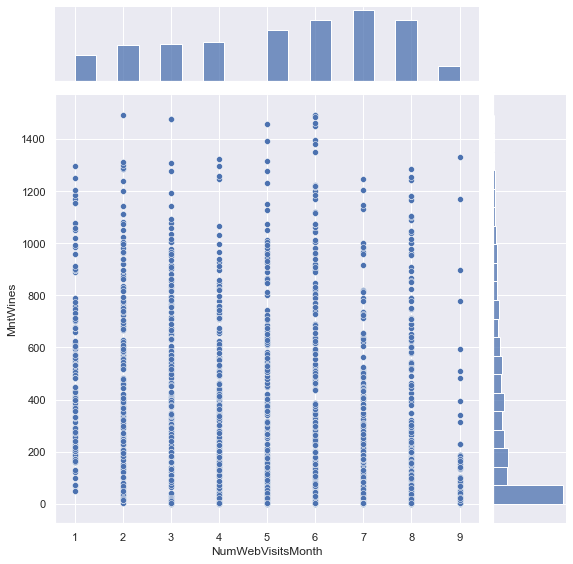

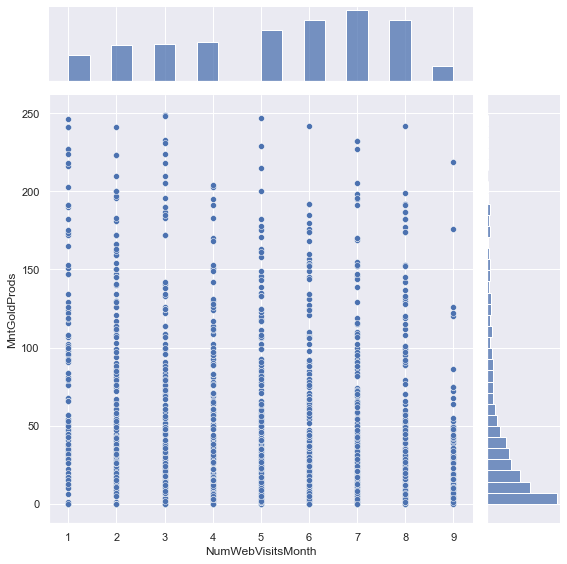

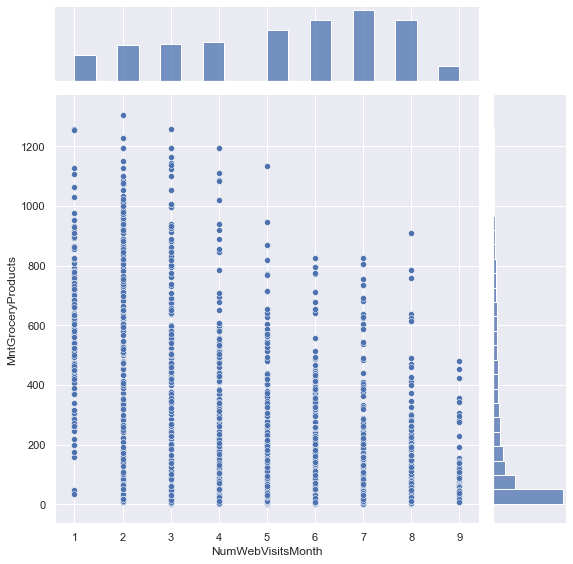

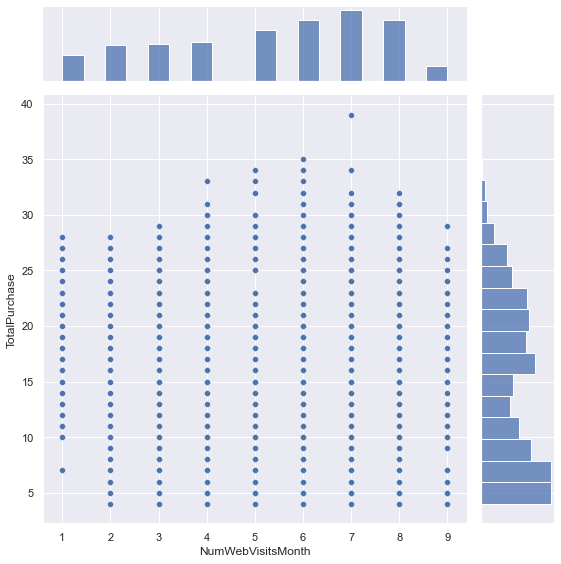

In [34]:
f = plt.figure(figsize=(2, 6))

# Predictor: Income
sb.jointplot(data = newCustomerData, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGoldProds", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "TotalPurchase", height = 8)

# Predictor: TotalChild
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "MntGoldProds", height = 8)
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "TotalChild", y = "TotalPurchase", height = 8)

# Predictor: NumWebVisitsMonth (can be treated as categorical variable too)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "MntGoldProds", height = 8)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "NumWebVisitsMonth", y = "TotalPurchase", height = 8)

# Formalizing Variable Types

In [35]:
newCustomerData['NumWebVisitsMonth'] = newCustomerData['NumWebVisitsMonth'].astype("category")
newCustomerData['YearRange'] = newCustomerData['YearRange'].astype("category")
newCustomerData['Dt_Customer'] = newCustomerData['Dt_Customer'].astype("datetime64[ns]")

C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1163: UserWarning: Parsing '15-11-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True

In [36]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2188 non-null   int64         
 1   Year_Birth           2188 non-null   int64         
 2   Education            2188 non-null   object        
 3   Marital_Status       2188 non-null   object        
 4   Income               2188 non-null   float64       
 5   Kidhome              2188 non-null   int64         
 6   Teenhome             2188 non-null   int64         
 7   Dt_Customer          2188 non-null   datetime64[ns]
 8   Recency              2188 non-null   int64         
 9   MntWines             2188 non-null   int64         
 10  MntFruits            2188 non-null   int64         
 11  MntMeatProducts      2188 non-null   int64         
 12  MntFishProducts      2188 non-null   int64         
 13  MntSweetProducts     2188 non-nul

# Machine Learning

## Linear Regression

### 1a) train_test_split Method (numerical VS numerical variables)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def normal_splitting(X, Y):
    

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData['Income']) # Predictor

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

IndentationError: expected an indented block (3859144871.py, line 9)

In [ ]:
linreg1 = LinearRegression()
linreg1.fit(X_train, Y_train)

print('Intercept \t: b = ', linreg1.intercept_)
print('Coefficients \t: a = ', linreg1.coef_)

regline_x = X_train
regline_y = linreg1.intercept_ + linreg1.coef_ * X_train

# Predict Response corresponding to Predictors
Y_train_pred = linreg1.predict(X_train)
Y_test_pred = linreg1.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(X_train, Y_train, color = "blue")
axes[0].plot(regline_x, regline_y, 'red', linewidth = 6)
axes[0].set_title("Regression Line on Train Set")

axes[1].scatter(X_test, Y_test, color = "green")
axes[1].scatter(X_test, Y_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")

for ax in axes.flat:
    ax.set(xlabel='Income', ylabel='MntGroceryProducts')

# Alternative:
# plt.subplot(1, 2, 1)
# plt.scatter(X_train, Y_train, color = "blue")
# plt.plot(regline_x, regline_y, 'red', linewidth = 6)
# plt.title("Regression Line on Train Set")
# plt.xlabel("Income")
# plt.ylabel("MntGroceryProducts")

# plt.subplot(1, 2, 2)
# plt.scatter(X_test, Y_test, color = "green")
# plt.scatter(X_test, Y_test_pred, color = "red")
# plt.title("Model Prediction on Test Set")
# plt.xlabel("Income")
# plt.ylabel("MntGroceryProducts")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
totalPurchases = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
income = pd.DataFrame(newCustomerData['Income']) # Predictor

# Split the Dataset into random Train and Test
income_train, income_test, totalPurchases_train, totalPurchases_test = train_test_split(income, totalPurchases, test_size = 0.2)

# Check the sample sizes
print("Train Set :", income_train.shape, totalPurchases_train.shape)
print("Test Set  :", income_test.shape, totalPurchases_test.shape)

Train Set : (1750, 1) (1750, 1)
Test Set  : (438, 1) (438, 1)


Intercept 	: b =  [1.10265415]
Coefficients 	: a =  [[0.00026716]]


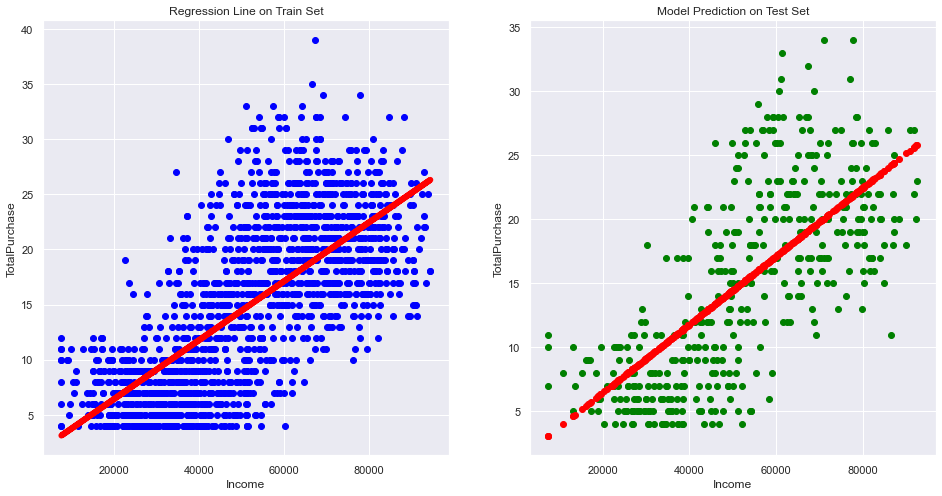

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5042325375417773
Mean Squared Error (MSE) 	: 28.366727317698537

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5096020645037735
Mean Squared Error (MSE) 	: 28.244974768888188

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 28.366727317698537

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 28.244974768888188



In [ ]:
linreg2 = LinearRegression()
linreg2.fit(income_train, totalPurchases_train)

print('Intercept \t: b = ', linreg2.intercept_)
print('Coefficients \t: a = ', linreg2.coef_)

regline_x = income_train
regline_y = linreg2.intercept_ + linreg2.coef_ * income_train

# Predict Response corresponding to Predictors
totalPurchases_train_pred = linreg2.predict(income_train)
totalPurchases_test_pred = linreg2.predict(income_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(income_train, totalPurchases_train, color = "blue")
axes[0].plot(regline_x, regline_y, 'red', linewidth = 6)
axes[0].set_title("Regression Line on Train Set")

axes[1].scatter(income_test, totalPurchases_test, color = "green")
axes[1].scatter(income_test, totalPurchases_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")

for ax in axes.flat:
    ax.set(xlabel='Income', ylabel='TotalPurchase')
    
# Alternative:
# plt.subplot(1, 2, 1)
# plt.scatter(income_train, totalPurchases_train, color = "blue")
# plt.plot(regline_x, regline_y, 'red', linewidth = 6)
# plt.title("Regression Line on Train Set")
# plt.xlabel("Income")
# plt.ylabel("TotalPurchase")

# plt.subplot(1, 2, 2)
# plt.scatter(income_test, totalPurchases_test, color = "green")
# plt.scatter(income_test, totalPurchases_test_pred, color = "red")
# plt.title("Model Prediction on Test Set")
# plt.xlabel("Income")
# plt.ylabel("TotalPurchase")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(income_train, totalPurchases_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_train, totalPurchases_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(income_test, totalPurchases_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_test, totalPurchases_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_train, totalPurchases_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_test, totalPurchases_test_pred))
print()

### 1b) train_test_split Method (numerical VS categorical variables)

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-295.30279986]
Variables: 
Response:  MntGroceryProducts
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5671626753932002
Mean Squared Error (MSE) 	: 32741.808705307187

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5797169606168215
Mean Squared Error (MSE) 	: 32541.791519932212

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 32741.808705307187

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 32541.791519932212



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


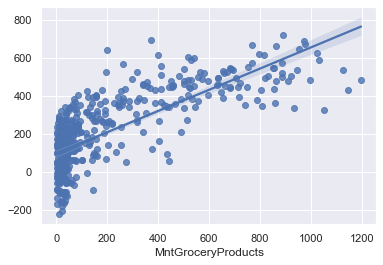

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 1) (1750, 1)
Test Set  : (438, 1) (438, 1)
Model intercept:  [606.02098987]


C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Variables: 
Response:  MntGroceryProducts
Predictors:  NumWebVisitsMonth, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.33542601715637466
Mean Squared Error (MSE) 	: 50271.43681880212

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3793920359268106
Mean Squared Error (MSE) 	: 48052.60524459705

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 50271.43681880212

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 48052.60524459705



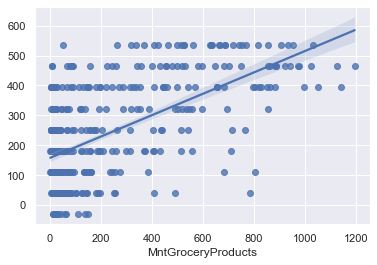

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData['NumWebVisitsMonth']) # Predictor (Categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 1) (1750, 1)
Test Set  : (438, 1) (438, 1)
Model intercept:  [-294.04471743]


C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Variables: 
Response:  MntGroceryProducts
Predictors:  Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5413251514259922
Mean Squared Error (MSE) 	: 34696.27801527625

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5779409934401747
Mean Squared Error (MSE) 	: 32679.301598124996

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 34696.27801527625

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 32679.301598124996



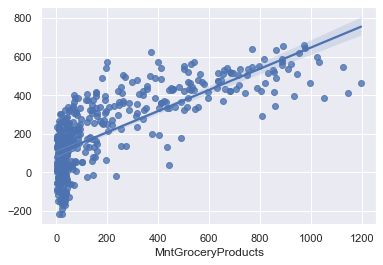

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts']) # Response
X = pd.DataFrame(newCustomerData['Income']) # Predictor (Numerical)
# income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

# X = pd.get_dummies(data=X, drop_first=True)
# X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred)
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 2) (1750, 1)
Test Set  : (438, 2) (438, 1)
Model intercept:  [-7.06780843]


C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Variables: 
Response:  TotalPurchase
Predictors:  NumWebVisitsMonth, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5448089061731833
Mean Squared Error (MSE) 	: 26.05536472859866

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5462395654658112
Mean Squared Error (MSE) 	: 25.92512478703796

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 26.05536472859866

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 25.92512478703796



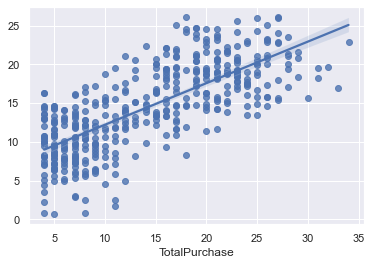

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
X = pd.DataFrame(newCustomerData['NumWebVisitsMonth']) # Predictor (Categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 1) (1750, 1)
Test Set  : (438, 1) (438, 1)
Model intercept:  [1.13256896]


C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Variables: 
Response:  TotalPurchase
Predictors:  Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5021817575339009
Mean Squared Error (MSE) 	: 28.495363929372246

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5142067128313693
Mean Squared Error (MSE) 	: 27.755288103690308

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 28.495363929372246

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 27.755288103690308



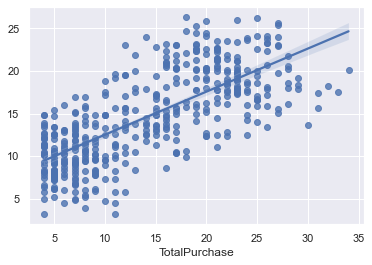

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
X = pd.DataFrame(newCustomerData['Income']) # Predictor (numerical)
# income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred = col_name

# X = pd.get_dummies(data=X, drop_first=True)
# X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred)
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [1.81344677]


C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Variables: 
Response:  TotalPurchase
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5036773456049624
Mean Squared Error (MSE) 	: 28.409755723931237

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5136678827554937
Mean Squared Error (MSE) 	: 27.78607359288887

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 28.409755723931237

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 27.78607359288887



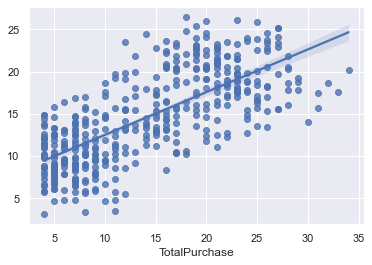

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['TotalPurchase']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-1.88828724]
Variables: 
Response:  MntGoldProds
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.22655567304763724
Mean Squared Error (MSE) 	: 1967.1370847328556

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.23918240798896773
Mean Squared Error (MSE) 	: 1940.7857141147492

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1967.1370847328556

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1940.7857141147492



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


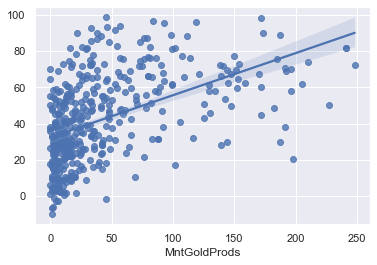

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGoldProds']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-364.85647395]
Variables: 
Response:  MntWines
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5512389108444293
Mean Squared Error (MSE) 	: 51412.58279101082

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5496225199285814
Mean Squared Error (MSE) 	: 47383.93027781437

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 51412.58279101082

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 47383.93027781437



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


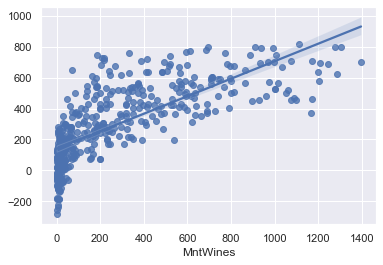

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntWines']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-244.12414182]
Variables: 
Response:  MntMeatProducts
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5298314867035101
Mean Squared Error (MSE) 	: 20978.010528691313

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5465135767028406
Mean Squared Error (MSE) 	: 21698.42942809571

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 20978.010528691313

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 21698.42942809571



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


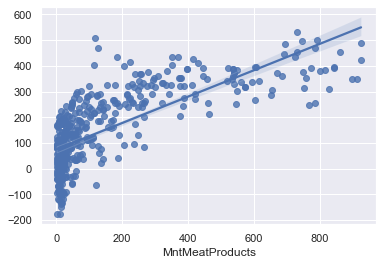

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntMeatProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-25.56822745]
Variables: 
Response:  MntFishProducts
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3428393307220522
Mean Squared Error (MSE) 	: 1948.5482055788827

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.32287602323203124
Mean Squared Error (MSE) 	: 1840.102206413539

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1948.5482055788827

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1840.102206413539



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


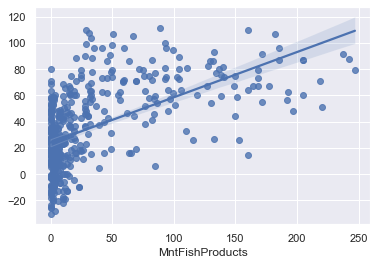

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntFishProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-20.11040007]
Variables: 
Response:  MntSweetProducts
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3400985707737779
Mean Squared Error (MSE) 	: 1100.5683609639987

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.34760978259983655
Mean Squared Error (MSE) 	: 964.9622577943579

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1100.5683609639987

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 964.9622577943579



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


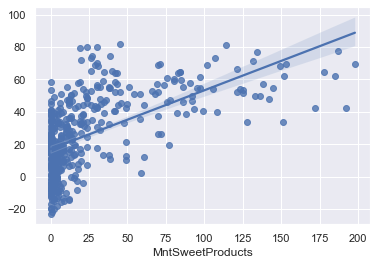

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntSweetProducts']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

Train Set : (1750, 7) (1750, 1)
Test Set  : (438, 7) (438, 1)
Model intercept:  [-25.61043058]
Variables: 
Response:  MntFruits
Predictors:  Education, Marital_Status, Income

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.32539052819180825
Mean Squared Error (MSE) 	: 1065.3138933227287

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.29762812746901834
Mean Squared Error (MSE) 	: 1049.4317822648634

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1065.3138933227287

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1049.4317822648634



C:\Users\LDW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


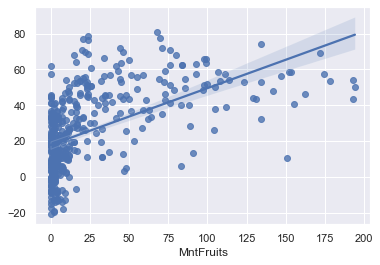

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntFruits']) # Response
X = pd.DataFrame(newCustomerData[['Education', 'Marital_Status']]) # Predictors (Categorical)
# X = pd.DataFrame(newCustomerData['Education']) # Predictors (categorical)
income = pd.DataFrame(newCustomerData['Income']) # Predictor (numercial)

cat_pred = []
for col_name in Y.columns:
    response = col_name
for col_name in X.columns:
    cat_pred.append(col_name)

X = pd.get_dummies(data=X, drop_first=True)
X = pd.concat([X, income], axis=1) # For multi-variate linear regression with numerical predictor variable

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

model = LinearRegression()
model.fit(X_train,Y_train)

print("Model intercept: ", model.intercept_)

predictions = model.predict(X_test)
predictions

sb.regplot(Y_test,predictions)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Variables: ")
print("Response: ", response)
print("Predictors: ", cat_pred[0] + ",", cat_pred[1] + ", Income")
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

### 2) K-Fold Method 

In [ ]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2188 non-null   int64  
 1   Year_Birth           2188 non-null   int64  
 2   Education            2188 non-null   object 
 3   Marital_Status       2188 non-null   object 
 4   Income               2188 non-null   float64
 5   Kidhome              2188 non-null   int64  
 6   Teenhome             2188 non-null   int64  
 7   Dt_Customer          2188 non-null   object 
 8   Recency              2188 non-null   int64  
 9   MntWines             2188 non-null   int64  
 10  MntFruits            2188 non-null   int64  
 11  MntMeatProducts      2188 non-null   int64  
 12  MntFishProducts      2188 non-null   int64  
 13  MntSweetProducts     2188 non-null   int64  
 14  MntGoldProds         2188 non-null   int64  
 15  NumDealsPurchases    2188 non-null   i

In [41]:
train_data = pd.read_csv('dataset/new_train_data.csv')
test_data = pd.read_csv('dataset/new_test_data.csv')

dropColumn = ["Unnamed: 0"]
train_data.drop(dropColumn,inplace= True,axis = 1)
test_data.drop(dropColumn,inplace= True,axis = 1)

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1751 non-null   int64  
 1   Education            1751 non-null   object 
 2   Marital_Status       1751 non-null   object 
 3   Complain             1751 non-null   int64  
 4   NumWebVisitsMonth    1751 non-null   int64  
 5   YearRange            1751 non-null   int64  
 6   HaveChild            1751 non-null   int64  
 7   AcceptedCmp          1751 non-null   int64  
 8   Income               1751 non-null   float64
 9   Kidhome              1751 non-null   int64  
 10  Teenhome             1751 non-null   int64  
 11  Dt_Customer          1751 non-null   object 
 12  Recency              1751 non-null   int64  
 13  MntWines             1751 non-null   int64  
 14  MntFruits            1751 non-null   int64  
 15  MntMeatProducts      1751 non-null   i

In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           437 non-null    int64  
 1   Education            437 non-null    object 
 2   Marital_Status       437 non-null    object 
 3   Complain             437 non-null    int64  
 4   NumWebVisitsMonth    437 non-null    int64  
 5   YearRange            437 non-null    int64  
 6   HaveChild            437 non-null    int64  
 7   AcceptedCmp          437 non-null    int64  
 8   Income               437 non-null    float64
 9   Kidhome              437 non-null    int64  
 10  Teenhome             437 non-null    int64  
 11  Dt_Customer          437 non-null    object 
 12  Recency              437 non-null    int64  
 13  MntWines             437 non-null    int64  
 14  MntFruits            437 non-null    int64  
 15  MntMeatProducts      437 non-null    int

In [44]:
train_data['NumWebVisitsMonth'].describe()

count    1751.000000
mean        5.326670
std         2.273719
min         1.000000
25%         4.000000
50%         6.000000
75%         7.000000
max         9.000000
Name: NumWebVisitsMonth, dtype: float64

In [45]:
test_data['NumWebVisitsMonth'].describe()

count    437.000000
mean       5.304348
std        2.169705
min        1.000000
25%        4.000000
50%        6.000000
75%        7.000000
max        9.000000
Name: NumWebVisitsMonth, dtype: float64

In [46]:
newCustomerData['NumWebVisitsMonth'].describe()

count     2188
unique       9
top          7
freq       392
Name: NumWebVisitsMonth, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

MODEL = LinearRegression()

def concatenator(cat_train, num_train):
    return pd.concat([cat_train, num_train], axis=1)

def encoder(splitted_data):
    return pd.get_dummies(data=splitted_data, drop_first=True)

def print_train_test(X_train, X_test, Y_train, Y_test):
    print("Train Set :", X_train.shape, Y_train.shape)
    print("Test Set  :", X_test.shape, Y_test.shape)

def univariate_kfold_linreg(train_response, train_predictor, var_type):
    Y_train = pd.DataFrame(train_response) # Response
    X_train = pd.DataFrame(train_predictor) # Predictor (Categorical)

    if var_type == "categorical":
        print(var_type)
        X_train = encoder(X_train)

    
    MODEL.fit(X_train,Y_train)
    return model, X_train, Y_train

def multivariate_kfold_linreg(train_response, train_cat_predictor, train_num_predictor):
    Y_train = pd.DataFrame(train_response) # Response
    cat_train = pd.DataFrame(train_cat_predictor) # Predictors (Categorical)
    num_train = pd.DataFrame(train_num_predictor) # Predictor (numercial)
    
    cat_train = encoder(cat_train)
    X_train = concatenator(cat_train, num_train) # For multi-variate linear regression with numerical predictor variable

    MODEL.fit(X_train,Y_train)
    return MODEL, X_train, Y_train

def results(model, X, Y):
    print("Model intercept: ", model.intercept_)

    predictions = model.predict(X)
    predictions

    sb.regplot(Y,predictions)

    Y_pred = model.predict(X)
     # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", model.score(X, Y))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y, Y_pred))
    print("Residual Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(Y, Y_pred)))
    print()

    
response_var = ["MntGroceryProducts", "TotalPurchase", "MntWines", "MntGoldProds"]
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange"]
num_predictors = ["Income", "TotalChild", "NumWebVisitsMonth"]

# print_train_test(X_train, X_test, Y_train, Y_test)
# train_data[predictors].info()
#     for col_name in Y_train.columns:
#         response = col_name
#     for col_name in cat_train.columns:
#         cat_pred = col_name
#     print("Variables: ")
#     print("Response: ", response)
#     print("Predictors: ", cat_pred + ", Income")
#     print()

In [48]:
splitted_train_data = pd.read_csv('dataset/splitted_train_data.csv')
cv_data = pd.read_csv('dataset/splitted_cv_data.csv')
new_test_data = pd.read_csv('dataset/new_test_data.csv')

dropColumn = ["Unnamed: 0"]
splitted_train_data.drop(dropColumn,inplace= True,axis = 1)
cv_data.drop(dropColumn,inplace= True,axis = 1)
new_test_data.drop(dropColumn,inplace= True,axis = 1)

Model intercept:  [-3522.21402622]


C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6898132546152927
Mean Squared Error (MSE) 	: 23857.687556775618
Residual Mean Squared Error (RMSE) 	: 154.45933949352371



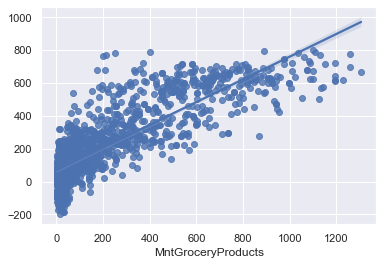

In [49]:
model, X_train, Y_train = multivariate_kfold_linreg(splitted_train_data[response_var[0]],
                                                    splitted_train_data[cat_predictors],
                                                     splitted_train_data[num_predictors])
results(model, X_train, Y_train)

Model intercept:  [-3522.21402622]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6929872806109258
Mean Squared Error (MSE) 	: 21228.55722997363
Residual Mean Squared Error (RMSE) 	: 145.7002307135223



C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


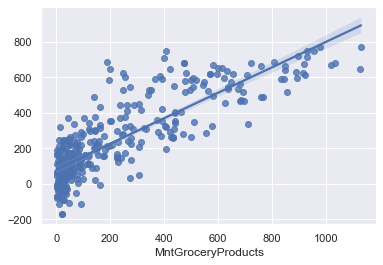

In [50]:
num_train = cv_data[num_predictors]
cat_train = encoder(cv_data[cat_predictors])
cv_X_train = concatenator(cat_train, num_train)

cv_Y_train = cv_data[response_var[0]]
results(model, cv_X_train, cv_Y_train)

Model intercept:  [-3522.21402622]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.652636344012288
Mean Squared Error (MSE) 	: 27323.480394963968
Residual Mean Squared Error (RMSE) 	: 165.29815605433706



C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


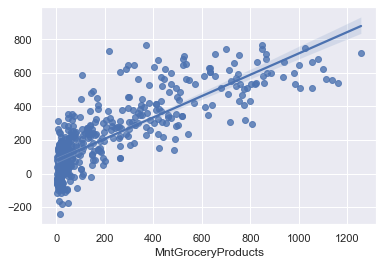

In [51]:
num_train = new_test_data[num_predictors]
cat_train = encoder(new_test_data[cat_predictors])
test_X_train = concatenator(cat_train, num_train)

test_Y_train = new_test_data[response_var[0]]
results(model, test_X_train, test_Y_train)

In [52]:
test_results(model, new_test_data, cv_data[response_var[0]])

NameError: name 'test_results' is not defined

In [54]:
test_results(model, X_test, cv_data[response_var[0]])

NameError: name 'test_results' is not defined

In [55]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[0]], test_data[response_var[0]], 
             train_data[num_predictors[2]], test_data[num_predictors[2]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [56]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[1]], test_data[response_var[1]], 
             train_data[num_predictors[2]], test_data[num_predictors[2]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [57]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[2]], test_data[response_var[2]], 
             train_data[num_predictors[2]], test_data[num_predictors[2]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [58]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[3]], test_data[response_var[3]], 
             train_data[num_predictors[2]], test_data[num_predictors[2]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [59]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(train_data[response_var[0]], test_data[response_var[0]], 
             train_data[num_predictors[0]], test_data[num_predictors[0]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [60]:
splitted_train_data = pd.read_csv('dataset/splitted_train_data.csv')
cv_data = pd.read_csv('dataset/splitted_cv_data.csv')
new_test_data = pd.read_csv('dataset/new_test_data.csv')

dropColumn = ["Unnamed: 0"]
splitted_train_data.drop(dropColumn,inplace= True,axis = 1)
cv_data.drop(dropColumn,inplace= True,axis = 1)
new_test_data.drop(dropColumn,inplace= True,axis = 1)

In [61]:
cat_predictors = ["Education", "Marital_Status", "HaveChild", "YearRange", "NumWebVisitsMonth"]
num_predictors = ["Income", "TotalChild", "Year_Birth"]

univariate_kfold_linreg(splitted_train_data[response_var[0]], cv_data[response_var[0]], 
                     splitted_train_data[num_predictors[0]], cv_data[num_predictors[0]], "numerical")

TypeError: univariate_kfold_linreg() takes 3 positional arguments but 5 were given

In [72]:
model, X_train, X_test = multivariate_kfold_linreg(splitted_train_data[response_var[0]], cv_data[response_var[0]], 
splitted_train_data[cat_predictors], cv_data[cat_predictors], 
             splitted_train_data[num_predictors], cv_data[num_predictors])
results(model, X_train, X_test, splitted_train_data[response_var[0]], new_test_data[response_var[0]])

TypeError: multivariate_kfold_linreg() takes 3 positional arguments but 6 were given

## Cross Validation

### Carrying out grid-search CV: choosing the best combination of parameters

In [75]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
MODEL.fit(X_train, Y_train)
rfe = RFE(MODEL)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train)    

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [67]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018286,0.005439,0.003126,0.006252,1,{'n_features_to_select': 1},0.363892,0.423350,0.350870,0.422489,...,0.368280,0.052814,13,0.379234,0.365343,0.382509,0.361723,0.393968,0.376555,0.011761
1,0.015900,0.000567,0.003124,0.006249,2,{'n_features_to_select': 2},0.378976,0.419672,0.378581,0.435440,...,0.379397,0.052544,12,0.391467,0.381579,0.391115,0.374472,0.408636,0.389454,0.011500
2,0.014039,0.008478,0.007070,0.007056,3,{'n_features_to_select': 3},0.373330,0.507529,0.497283,0.480758,...,0.458539,0.049533,11,0.400921,0.483347,0.485033,0.489998,0.498397,0.471539,0.035695
3,0.015878,0.000496,0.000000,0.000000,4,{'n_features_to_select': 4},0.481511,0.513750,0.501245,0.487487,...,0.482205,0.029765,10,0.497021,0.489017,0.489731,0.495489,0.501816,0.494615,0.004767
4,0.009159,0.007489,0.006247,0.007651,5,{'n_features_to_select': 5},0.484057,0.521746,0.512690,0.491262,...,0.487408,0.033042,4,0.501650,0.492428,0.493374,0.499811,0.504878,0.498428,0.004805
5,0.009271,0.007572,0.001635,0.002374,6,{'n_features_to_select': 6},0.477155,0.519805,0.513895,0.492146,...,0.486686,0.032007,5,0.503458,0.492550,0.493483,0.500125,0.509246,0.499772,0.006248
6,0.009375,0.007654,0.006250,0.007655,7,{'n_features_to_select': 7},0.476110,0.521661,0.514279,0.489201,...,0.485678,0.033597,6,0.503692,0.492686,0.493608,0.500965,0.510363,0.500263,0.006572
7,0.009655,0.007899,0.006249,0.007653,8,{'n_features_to_select': 8},0.471901,0.520357,0.514170,0.486102,...,0.484689,0.032244,7,0.504299,0.492815,0.493619,0.501391,0.510538,0.500532,0.006669
8,0.012501,0.006251,0.006250,0.007655,9,{'n_features_to_select': 9},0.472255,0.519477,0.514104,0.483947,...,0.484267,0.031790,8,0.504312,0.492849,0.493619,0.501558,0.510603,0.500588,0.006687
9,0.012502,0.006251,0.003126,0.006251,10,{'n_features_to_select': 10},0.472203,0.519019,0.514060,0.483610,...,0.484061,0.031733,9,0.504313,0.492926,0.493648,0.501642,0.510607,0.500627,0.006667


### Visualising the results for the grid-search CV, finding that 11 is the optimal number of features

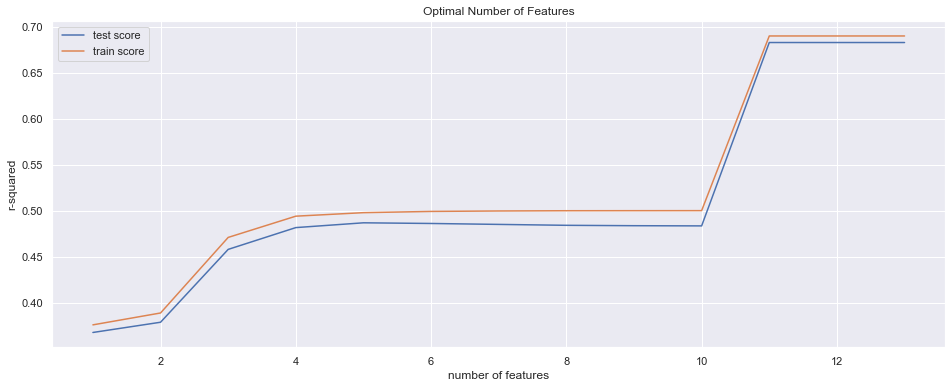

In [73]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [71]:
# final model
n_features_optimal = 11

lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, y_pred)
print(r2)

NameError: name 'X_test' is not defined

## Exponential Regression (for reference)

In [64]:
X = np.array(newCustomerData['Income'])
print(X)
Y = np.array(newCustomerData['MntGroceryProducts'])
print(Y)

[58138. 46344. 71613. ... 56981. 69245. 52869.]
[806   9 287 ... 297 324  66]


In [65]:
ylog_data = np.log(Y)
print(ylog_data)
  
curve_fit = np.polyfit(X, ylog_data, 1)
print(curve_fit)

[6.69208374 2.19722458 5.65948222 ... 5.69373214 5.78074352 4.18965474]
[6.02032772e-05 1.37033299e+00]


In [ ]:
y = np.exp(1.37938297e+00) * np.exp(6.00146653e-05*X)
  
print(y)

[130.12760959  64.11655627 292.13417382 ... 121.39851102 253.4327416
  94.85015303]


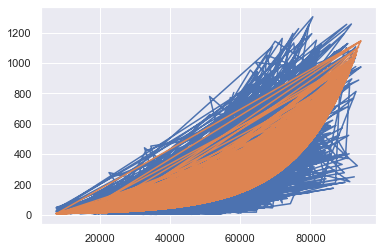

In [ ]:
# Blue 
plt.plot(X, Y)
  
# best fit in orange
plt.plot(X, y)

In [ ]:
# sample_data = pd.DataFrame(newCustomerData['NumWebVisitsMonth'])
# sample_data = sample_data.sample(n=1000,replace="False")
# sample_data.shape

In [ ]:
# newCustomerData['Income'].describe()